# 1.3.2. Numerical operations on arrays
## 1.3.2.1 Elementwise operations
### 1.3.2.1.1. Basic operations

In [1]:
%matplotlib inline

In [2]:
import numpy as np
a = np.array([1, 2, 3, 4])

In [3]:
a + 1            # a里元素全加，全乘，全...

array([2, 3, 4, 5])

In [4]:
2*a

array([2, 4, 6, 8])

In [5]:
2**a

array([ 2,  4,  8, 16])

In [6]:
b = np.ones(4) + 1

In [7]:
a - b        # element级别的算数操作， 每个对应元素相减

array([-1.,  0.,  1.,  2.])

这些 numpy 的 array 操作比 pure python 快很多：

In [8]:
a = np.arange(10000)

In [9]:
%timeit a+1

The slowest run took 18.17 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.12 µs per loop


In [10]:
l = range(10000)

In [11]:
%timeit [i+1 for i in l]

1000 loops, best of 3: 335 µs per loop


In [12]:
c = np.ones((3, 3))

In [13]:
c*c       # 对应值相乘，而不是 matrix multiplication

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [14]:
c.dot(c)          # Matrix multiplication

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

In [15]:
a = np.arange(0,10000, 2)

In [16]:
b = np.arange(1,10000, 2)

In [17]:
%timeit a+b

The slowest run took 22.51 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.1 µs per loop


In [18]:
a = range(0, 10000, 2)

In [19]:
b = range(0, 10000, 2)

In [20]:
c = np.ones(5)

In [21]:
c = c + c

In [22]:
c

array([ 2.,  2.,  2.,  2.,  2.])

In [23]:
d = np.arange(0, 5)

In [24]:
c**d

array([  1.,   2.,   4.,   8.,  16.])

### 1.3.2.1.2. Other operations

两个 array ， 对应元素之间比较：

In [25]:
a = np.array([1,2,3,4])

In [26]:
b = np.array([4,2,2,4])

In [27]:
a == b

array([False,  True, False,  True], dtype=bool)

**Array-wise comparisons:**
<br>
用np.array_equal(a, b)做两个array内容上的比较。

In [28]:
a = np.arange(0, 5)
b = np.arange(0, 6)
c = np.arange(0, 5)

In [29]:
np.array_equal(a, b)    

False

In [30]:
np.array_equal(a, c)

True

**Logical operation：**
<br>
用0， 1代表True, False，并在element-wise 上，做逻辑 and, or, not, xor 的 operation.

In [31]:
a = np.array([1, 1, 0, 0], dtype = bool)

In [32]:
b = np.array([1, 0, 1, 0], dtype = bool)

In [33]:
np.logical_and(a, b)             # ^^

array([ True, False, False, False], dtype=bool)

In [34]:
np.logical_not(a)

array([False, False,  True,  True], dtype=bool)

**Transcendental functions:**
<br>
就是 np.函数(**<font color = red>注意是numpy的函数</font>，而不是math里的函数**)作用在 array 上。

In [35]:
a = np.arange(5)

In [36]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [37]:
np.log(a)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436])

注意：np.exp(x) 返回 $e^x$

In [38]:
np.exp(a)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

**Shape mismatches:**
<br>
若两个 array 的 shape 不同，无法运算。 

In [40]:
# a = np.arange(4)
# a + np.array([1, 2])

**Transposition 转置:**

In [41]:
a = np.triu(np.ones((3, 3)), 1)      
# see help(np.triu) 生产上下三角形matrix的
# matlab 也有

In [42]:
a

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [43]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

下面code illustrates 怎样用 **np.triu()**：<br>
lower triangle 咋办？     用 np.tril()  或者 转置。<br>
upper triangle 咋弄？                用 np.triu()

In [44]:
b = np.ones((3, 3))

In [45]:
b

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [46]:
np.triu(b)

array([[ 1.,  1.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [47]:
np.triu(b, 1)           # 上 三角形

array([[ 0.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [48]:
np.tril(b, -1)          # 下 三角形

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

关于<font color = red>np.allclose</font>函数：<br>
下面是internet上摘抄的一句话，不通顺，但可解释该函数的用处。
>下面对prop列进行加和看是不是等于1，由于是浮点型数据，用的是allclose函数,判断是否和1足够接近

## 1.3.2.2. Basic reductions 聚合函数
### 1.3.2.2.1. Computing sums

In [49]:
x = np.array([1, 2, 3, 4])

In [50]:
np.sum(x)

10

In [51]:
x.sum()

10

Sum by rows and by columns:

In [52]:
x = np.array([[1, 1], [2, 2]])

In [53]:
x

array([[1, 1],
       [2, 2]])

In [54]:
x.sum(axis = 0)        # 列

array([3, 3])

In [55]:
x[:, 0].sum()            # 所有行， 第0列

3

In [56]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [57]:
x.sum(axis = 1)      #  行

array([2, 4])

In [58]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

In case of higher dimensions:

In [59]:
x = np.arange(0,8000000).reshape(200,200,200)

In [60]:
x

array([[[      0,       1,       2, ...,     197,     198,     199],
        [    200,     201,     202, ...,     397,     398,     399],
        [    400,     401,     402, ...,     597,     598,     599],
        ..., 
        [  39400,   39401,   39402, ...,   39597,   39598,   39599],
        [  39600,   39601,   39602, ...,   39797,   39798,   39799],
        [  39800,   39801,   39802, ...,   39997,   39998,   39999]],

       [[  40000,   40001,   40002, ...,   40197,   40198,   40199],
        [  40200,   40201,   40202, ...,   40397,   40398,   40399],
        [  40400,   40401,   40402, ...,   40597,   40598,   40599],
        ..., 
        [  79400,   79401,   79402, ...,   79597,   79598,   79599],
        [  79600,   79601,   79602, ...,   79797,   79798,   79799],
        [  79800,   79801,   79802, ...,   79997,   79998,   79999]],

       [[  80000,   80001,   80002, ...,   80197,   80198,   80199],
        [  80200,   80201,   80202, ...,   80397,   80398,   80399],
  

In [61]:
%timeit x.sum(axis = 2)[0, 1]        # 这个相比下条命令，较难理解

100 loops, best of 3: 6.06 ms per loop


In [62]:
%timeit x[0, 1, :].sum()      # 第0个元素， 中的 第一个元素， 中的所有元素相加

The slowest run took 9.27 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.58 µs per loop


#### Other reduction
**Extrema:**

In [63]:
x = np.array([1,3,2])

In [64]:
x.min()

1

In [65]:
x.argmin()     # 最小值的 索引

0

**Logical operations:**

In [66]:
np.all([False, False, True])       # 所有值都是真， 才真

False

In [67]:
np.any([True, True, False])

True

可用来对 array 的比较：

In [68]:
a = np.zeros((100, 100))

In [69]:
np.any(a != 0)

False

In [70]:
a = np.array([1,2,3,2])

In [71]:
b = np.array([2,2,3,2])

In [72]:
c = np.array([6,4,4,5])

In [73]:
((a<=b)&(b<=c)).all()        # array([ True,  True,  True,  True], dtype=bool)

True

**Statisics   统计:**

In [74]:
x = np.array([1,2,3,1])

In [75]:
y = np.array([[1,2,3], [5,6,1]])

In [76]:
x.mean()

1.75

In [77]:
np.median(x)        # 中位数　　1   1   2  3   ,　　(1+2)/2 = 1.5

1.5

In [78]:
np.median(y, axis = -1)      #  last axis

array([ 2.,  5.])

In [79]:
np.std(x)          # 标准差　　x.std() 也可

0.82915619758884995

In [82]:
x.var()       # 方差

0.6875

In [83]:
x.var(ddof = 1)    #　样本方差     x.std(ddof = 1) 样板标准差

0.91666666666666663

np.cumsum()  表示累积和：

In [84]:
a = np.array([[1,2,3], [4,5,6]])

In [85]:
np.cumsum(a)        

array([ 1,  3,  6, 10, 15, 21])

In [86]:
np.sum(a, axis = 1)

array([ 6, 15])

**Worked Example: data statistics**
<br>
有个 populations.txt　(http://www.scipy-lectures.org/_downloads/populations.txt)　的数据集，我们准备用notebook打开瞧瞧：

In [87]:
!cat data/populations.txt      # 注意　!cat

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300

In [88]:
data = np.loadtxt('data/populations.txt')

In [89]:
year, hares, lynxes, carrots = data.T    # 每一行　送　一变量

画图：

In [90]:
%matplotlib inline
from matplotlib import pyplot as plt

<font color = red>画图这，还没整明白，以后再弄</font>

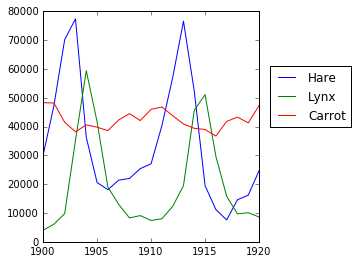

In [91]:
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))
plt.show()

In [92]:
populations = data[:, 1:]

In [93]:
populations.mean(axis = 0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

In [94]:
populations.std(axis = 0)

array([ 20897.90645809,  16254.59153691,   3322.50622558])

哪种东西　有　最高的population each year?

In [95]:
populations.argmax(axis = 1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

## 1.3.2.3. Broadcasting 广播

* numpy arrays上的基本操作都是 elementwise级别的；
* 要求 arrays 们有 the same size.
> **Nevertheless**, 当 array 们尺寸不同时, ***Numpy*** 能尽量把它们弄成same size: this conversion is called **broadcasting**.

The image below gives an example of broadcasting:
![broadcasting](http://www.scipy-lectures.org/_images/numpy_broadcasting.png "broadcasting")

In [96]:
a = np.arange(0, 40, 10).reshape(4, 1)

In [97]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [98]:
b = np.array([0,1,2])

In [99]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

**Broadcasting练习：计算＃６６公路所途经各城市间的距离**

In [100]:
a = np.array([1,2,3,4,5])      # 用到　np.newaxis

In [101]:
b = a[np.newaxis, :]       # b = a[:, np.newaxis]  增加维度

In [102]:
print a.shape, b.shape

(5,) (1, 5)


In [103]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

In [104]:
temp = mileposts[:, np.newaxis]

In [105]:
distance_array = np.abs(mileposts - temp)

In [106]:
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

计算二维坐标系中的点到原点的距离，经常要用broadcasting:

In [107]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]

In [108]:
dist = np.sqrt(x**2+y**2)

In [109]:
dist

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

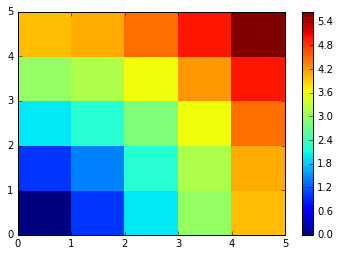

In [110]:
plt.pcolor(dist)
plt.colorbar()

**Remark: 用 numpy.ogrid function 或者 numpy.mgrid 生产上述 grid 样式的数据**

In [111]:
x, y = np.ogrid[0:5, 0:5]

In [112]:
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [113]:
x.shape, y.shape

((5, 1), (1, 5))

In [114]:
distance = np.sqrt(x**2 + y**2)

当我们不想或不可以用broadcasting的时候，可以用 np.mgrid 函数生成grid样子的数据。

In [115]:
x, y = np.mgrid[0:4, 0:4]

In [116]:
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [117]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

## 1.3.2.4 Array shape manipulation
### 1.3.2.4.1 Flattening 拉伸

In [118]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [119]:
a.ravel()        # 拉伸

array([1, 2, 3, 4, 5, 6])

In [120]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [121]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

### 1.3.2.4.2. Reshaping
np.reshape 是 flattening 的 inverse operation:

In [122]:
a.shape

(2, 3)

In [123]:
b = a.ravel()

In [124]:
b = b.reshape(3, -1)        # -1：当３指定好了，-1处将根据array情况自动计算，此处结果定然是２啦

In [125]:
b

array([[1, 2],
       [3, 4],
       [5, 6]])

**<font color = red>CAUSION: reshape 是一种 view 操作，即，下例的b改动了a的值，小心了！</font>**

In [126]:
b[0, 0] = 999

In [127]:
a

array([[999,   2,   3],
       [  4,   5,   6]])

**<font color = red>CAUSION: 下面的 reshape 却返回了一个copy, 这咋回事？？？</font>**

In [128]:
a = np.zeros((3,2))

In [129]:
b = a.T.reshape(3*2)     # 1 dim的

In [130]:
b[0] = 9

In [131]:
b

array([ 9.,  0.,  0.,  0.,  0.,  0.])

In [132]:
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [133]:
b

array([ 9.,  0.,  0.,  0.,  0.,  0.])

In [134]:
# b.reshape(-1, 4)       #　这个形状不对，　-1无法算出

### 1.3.2.4.3. Adding a dimension

In [135]:
z = np.array([1,2,3])

In [136]:
z

array([1, 2, 3])

In [137]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [138]:
z[np.newaxis, :]       # 注意，　这和array([1,2,3])不同，它是１d, 咱是2d哦

array([[1, 2, 3]])

### 1.3.2.4.4. Dimension shuffling

In [139]:
a = np.arange(4*3*2).reshape(4, 3, 2)

In [140]:
a.shape

(4, 3, 2)

In [141]:
a[0, 2, 1]

5

In [142]:
b = a.transpose(1, 2, 0)       # transpose(1,2,0)　里面的参数表维度

In [143]:
b.shape         # a.shape 是(4,3,2)

(3, 2, 4)

In [144]:
b[2, 1, 0]

5

In [145]:
a[0, 2, 1] = 999

In [146]:
b[2, 1, 0]        # 我擦，又是个view, 而不是copy

999

### 1.3.2.4.4. Resizing
ndarray.resize can change the size of an array:

In [147]:
a = np.arange(4)

In [148]:
a.resize(8)      # 或者　a.resize((8,))

In [149]:
a.resize(9)

In [150]:
a.resize(4)

In [151]:
a

array([0, 1, 2, 3])

**<font color = red> 一个坑</font>**

In [152]:
#  a.resize(6)      # 上句有引用，本句就不能改尺寸，可用np.resize()改

In [153]:
np.resize(a, 5)

array([0, 1, 2, 3, 0])

In [154]:
a         # a　没变

array([0, 1, 2, 3])

## 1.3.2.5. Sorting data
Sorting along an axis:

In [155]:
a = np.array([[4, 3, 5], [1, 2, 1]])

In [156]:
b = np.sort(a, axis = 1)

In [157]:
b

array([[3, 4, 5],
       [1, 1, 2]])

In [158]:
a.sort(axis = 1)

In [159]:
a

array([[3, 4, 5],
       [1, 1, 2]])

返回sorting的索引：

In [160]:
a = np.array([4, 3, 1, 2])

In [161]:
j = np.argsort(a)

In [162]:
j

array([2, 3, 1, 0])

In [163]:
a[j]

array([1, 2, 3, 4])

In [164]:
np.array_equal(a, a[j])

False

找 minima and maxima:

In [165]:
a = np.array([4, 3, 1, 2])

In [166]:
j_max = np.argmax(a)

In [167]:
j_min = np.argmin(a)

In [168]:
j_max, j_min

(0, 2)

## 1.3.2.6. Summary
* 知道咋创建 arrays: array, arange, ones, zeros
* 知道 array.shape 和 slicing a array, 比如：array[::2], 注意，这是一个 view 操作
* 用 mask 获得 subset, 如：a[a < 0] = 0
* Know miscellaneous operations on arrays, such as: array.max(), array.mean(). 不用知道所有的，但是得会用documentation (online docs, help(), **<font color = blue>lookfor(), np.lookfor('create array'), np.array?</font>**) !!!
* 对于高级应用：熟练掌握用indexing with arrays of integers, 还有 **broadcasting**. Know more NumPy functions to handle various array operations.